In [1]:
from pathlib import Path
import os
import sys

sys.path.append(Path(os.path.abspath('')).parent)
os.chdir(Path(os.path.abspath('')).parent)

import numpy as np
import pandas as pd 
import xarray as xr

import config.settings as cset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import geopandas as gpd 
from matplotlib import colormaps as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import box

from config.settings import (labelsize_small, 
                            labelsize_medium, 
                            labelsize_large,
                            )


In [6]:
tas_df = pd.read_csv(cset.file_tas)
tas_df = tas_df[(~tas_df['run'].str.contains('Ref_1p5'))].copy()
tas_df = tas_df.rename(columns = {'run': 'scen_run', 'tas': 'tas_soc'})
tas_df = tas_df.dropna(subset=['tas_soc']).groupby('iso').filter(lambda x: x['tas_soc'].notna().all())
tas_df.loc[tas_df['scen_run'].str.contains('Refv2'), 'scen_run'] = tas_df['scen_run'].str.replace('Refv2', 'Ref')

In [18]:
ref_mean = tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Ref'))].loc[:, ['year', 'tas_soc']].groupby('year').median().values.flatten()
neg_mean = tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Neg'))].loc[:, ['year', 'tas_soc']].groupby('year').median().values.flatten()

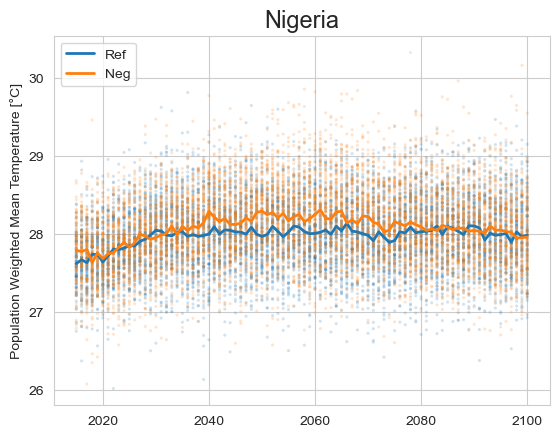

In [24]:
with sns.axes_style('whitegrid'):
    plt.figure()
    plt.scatter(tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Ref'))].year, tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Ref'))].tas_soc, s  = 5, alpha = .2, edgecolor = 'none')
    plt.scatter(tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Neg'))].year, tas_df[(tas_df.iso == 'NGA') & (tas_df.scen_run.str.contains('Neg'))].tas_soc,  s  = 5, alpha = .2, color = 'C1', edgecolor = 'none')
    plt.plot(np.arange(2015,2101,1), ref_mean, label='Ref', color = 'C0', lw = 2)
    plt.plot(np.arange(2015,2101,1), neg_mean, label='Neg', color = 'C1', lw = 2)
    plt.title('Nigeria', fontsize = labelsize_large)
    plt.ylabel('Population Weighted Mean Temperature [°C]')
    plt.legend()
    plt.show()

- variability plays a key role in shaping future GDP 
- 